In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
loan_train=pd.read_csv('C:\\Users\\HP User\\Downloads\\train_u6lujuX_CVtuZ9i.csv')
loan_test=pd.read_csv('C:\\Users\\HP User\\Downloads\\test_Y3wMUE5_7gLdaTN.csv')

# Data Analysis on train data:

In [209]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [210]:
loan_train.shape,loan_train.size

((614, 13), 7982)

In [211]:
#number of two classes:
loan_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

============Missing Values===========================

In [212]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [213]:
sum(loan_train.isnull().sum())

149

In [214]:
ratio=149*100/614
ratio          #out of total data 24.26% missing data is there

24.267100977198698

In [215]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Categorical variables are:
Loan_ID,Gender,Married,Dependents,Education,Self-Employed,Property_Area,Loan_Status
Numaerical Variables are:
ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [216]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:
    
    (i)only numerical variables gives above description
    
    (ii)actual total count 614 but if we consider LoanAmounr the count is 592 
          i.e missing values are 614-592=22
        
    (iii)similarly the  missing values for other variables are 
           Loan_Amount_Term 614-600=14
           Credit_History  614-564=50
            
    (iv)we have credit history 84%(mean=0.84)

# Frequency Distribution for numerical Varaibles:

# Applicant Income:

In [217]:
loan_train['ApplicantIncome'].isnull().sum()  #No null values

0

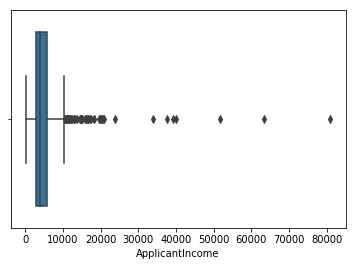

In [218]:
sns.boxplot(x=loan_train['ApplicantIncome'])

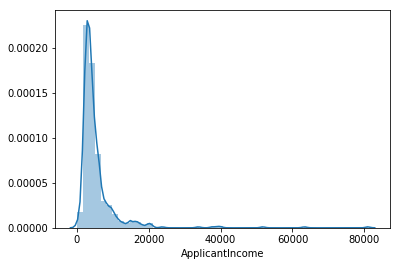

In [219]:
sns.distplot(loan_train['ApplicantIncome'])

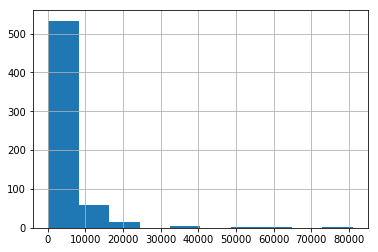

In [220]:
loan_train['ApplicantIncome'].hist(bins=10)

# Insight:
most of the applicant income between 2000-6000

so many outliers in income,think about this waht factors effect the income

(a)Education   (b)job

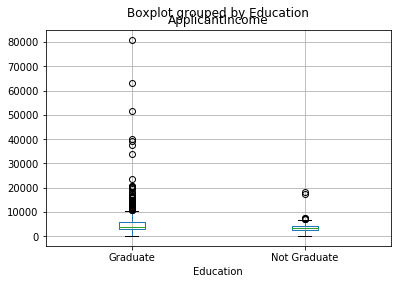

In [221]:
# Compare income with Education;
loan_train.boxplot(column='ApplicantIncome',by='Education')

Insights:
    (i)Graduates Incomes are more han the Not Graduates
    (ii)But Graduates With Higer number of incomes are outliers

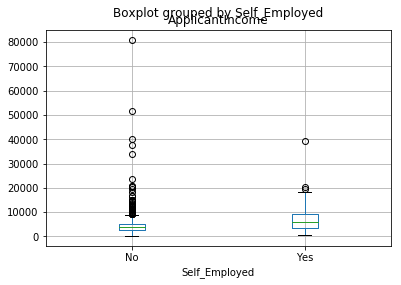

In [222]:
#Compare Income with job:
loan_train.boxplot(column='ApplicantIncome',by='Self_Employed')

Insights:
    (i)the mean and counrt of self-employed income is less than employees
    (ii)but the employees with more income considere as outliers

# LoanAmount:

In [223]:
loan_train['LoanAmount'].isnull().sum()  # 22 null values are there

22

In [224]:
loan_train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

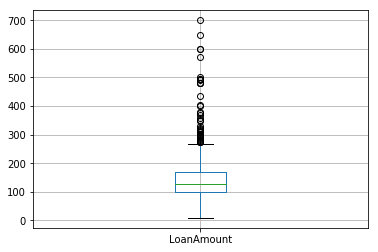

In [225]:
loan_train.boxplot('LoanAmount')

# Credit History:

In [226]:
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [227]:
#missing values:
loan_train['Credit_History'].isnull().sum()  #50 missing values in credit history

50

In [228]:
# Analyze Credit History with loan status:
len(loan_train[(loan_train.Credit_History==1.0)&(loan_train.Loan_Status=='Y')])

378

In [229]:
len(loan_train[(loan_train.Credit_History==1.0)&(loan_train.Loan_Status=='N')])

97

In [230]:
len(loan_train[(loan_train.Credit_History==0)&(loan_train.Loan_Status=='Y')])

7

In [231]:
len(loan_train[(loan_train.Credit_History==0)&(loan_train.Loan_Status=='N')])

82

In [232]:
#Above same we can do by cross table :
R1=pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
R1

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


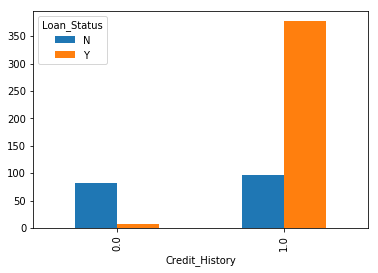

In [233]:
R1.plot(kind='bar')

In [234]:

R2=loan_train.pivot_table(values='Loan_Status',index=['Credit_History'],
                          aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
R2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


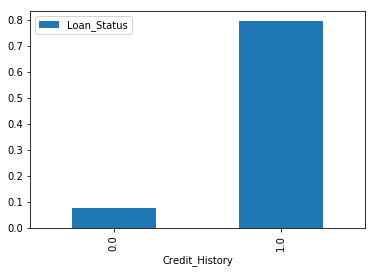

In [235]:
R2.plot(kind='bar')

we can connect MSexcel-Python it is same as pivot table and give the probabilities

# Insight:
The people who meets Credit Guidelines those are getting Loan

# Categorical variables:
# Gender:

In [236]:
loan_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [237]:
#missing values:
loan_train['Gender'].isnull().sum()       #13 missing values are there

13

Relation between loan_status and gender:

In [238]:
R_g=pd.crosstab(loan_train['Loan_Status'],loan_train['Gender'])
R_g

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


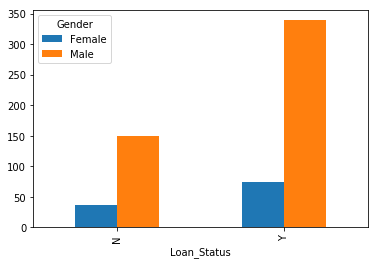

In [239]:
R_g.plot(kind='bar')

In [240]:
R_g1=loan_train.pivot_table(values='Loan_Status',index=['Gender'],
                          aggfunc=lambda y:y.map({'Y':1,'N':0}).mean())
R_g1

,Loan_Status
Gender,
Female,0.669643
Male,0.693252


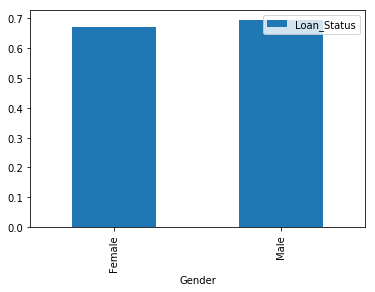

In [241]:
R_g1.plot(kind='bar')

# Insight:
Probability of getting loan_status is almost same by Both female and male 

# Gender vs CreditHistory:


In [242]:
R_gc=pd.crosstab([loan_train.Gender,loan_train.Credit_History],loan_train.Loan_Status)
R_gc

Loan_Status             N    Y
Gender Credit_History         
Female 0.0             16    1
       1.0             20   64
Male   0.0             63    6
       1.0             75  307

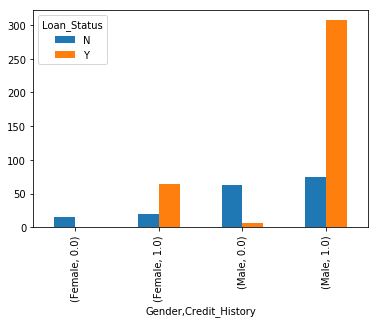

In [243]:
R_gc.plot(kind='bar')

In [244]:
R_gc1=loan_train.pivot_table(values='Loan_Status',index=['Gender','Credit_History'],
                          aggfunc=lambda y:y.map({'Y':1,'N':0}).mean())
R_gc1

Loan_Status
Gender Credit_History             
Female 0.0                0.058824
       1.0                0.761905
Male   0.0                0.086957
       1.0                0.803665

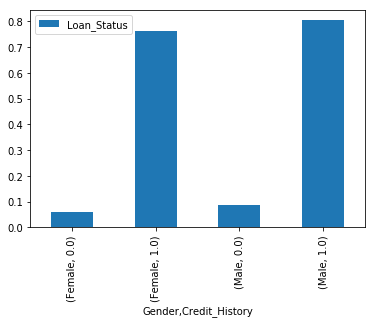

In [245]:
R_gc1.plot(kind='bar')

# Insights:

Here we get some good insights

(i)if we look only gender there is 66% chance to female and 69% chance to male

(ii)if we look only the people who meets credit guidlines those only get the loan

(iii)but males who meet credit guidliness 4% more chance to fet the loan

(iv)some people who meet The credit guidlines also not getting loan

(v)very low male people did not meet credit guide lines also getting the loan 

# Married:

In [246]:
loan_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [247]:
#missing values in married:
loan_train['Married'].isnull().sum()

3

In [248]:
#only three missing values are ther impute this missing values with mode:
loan_train['Married'].fillna(loan_train['Married'].mode()[0],inplace=True)

In [249]:
loan_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [250]:
loan_train['Married'].isnull().sum()

0

Relation with married and loanstatus:

In [251]:
R_ml=pd.crosstab(loan_train.Married,loan_train.Loan_Status)
R_ml

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


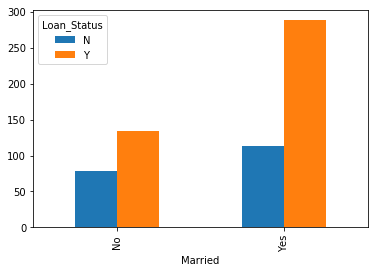

In [252]:
R_ml.plot(kind='bar')

In [253]:
R_ml2=loan_train.pivot_table(values='Loan_Status',index='Married',
                            aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
R_ml2

,Loan_Status
Married,
No,0.629108
Yes,0.718204


# Insights:

The persons who got married more chnace to get loan

# Impute the Missing values:

Gender:

In [254]:

loan_train.Gender.isnull().sum()

13

In [255]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0],inplace=True)
loan_train.Gender.isnull().sum()

0

Dependents:

In [256]:
loan_train['Dependents'].isnull().sum()

15

In [257]:
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace=True)
loan_train['Dependents'].isnull().sum()

0

Self_Employed:

In [258]:
loan_train['Self_Employed'].isnull().sum()

32

In [259]:
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)
loan_train['Self_Employed'].isnull().sum()

0

Loan_amount:
    lets go with some idea that loan_amount depends on education and employeement 

In [260]:
table=loan_train.pivot_table(values='LoanAmount',index=['Education','Self_Employed']
                            ,aggfunc='median')
table

LoanAmount
Education    Self_Employed            
Graduate     No                  130.0
             Yes                 157.5
Not Graduate No                  113.0
             Yes                 130.0

In [261]:
table1=loan_train.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education'
                            ,aggfunc='median')
table1

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


Loan_Amoun term:

In [263]:
loan_train['Loan_Amount_Term'].isnull().sum()

14

In [264]:
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0],inplace=True)
loan_train['Loan_Amount_Term'].isnull().sum()

0

Credit History:

In [265]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0],inplace=True)
loan_train['Credit_History'].isnull().sum()

0

# Converting categorical to numerical:

we can replace by label encoder:

In [266]:
columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    loan_train[i]=le.fit_transform(loan_train[i])
#same we can do map function also map({ý:1,n:o})

In [267]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Working on extreme values in LoanAmount and Income:

LoanAmount:

In [268]:
# apply log transformation:
loan_train['LoanAmount']=np.log(loan_train['LoanAmount'])

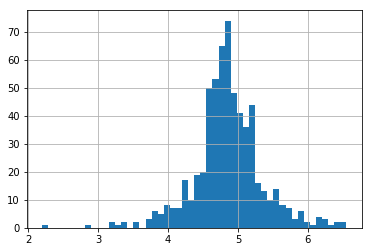

In [269]:
loan_train['LoanAmount'].hist(bins=50)

Applicantincome & Coapplicantincome:

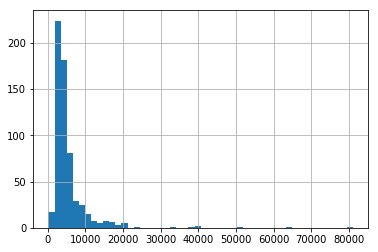

In [270]:
loan_train['ApplicantIncome'].hist(bins=50)

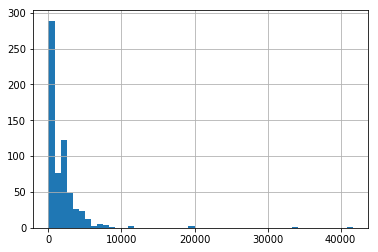

In [271]:
loan_train['CoapplicantIncome'].hist(bins=50)

In [272]:
# It is good idea we can combine both incomes
loan_train['ApplicantIncome']=np.log(1+loan_train['ApplicantIncome'])
loan_train['CoapplicantIncome']=np.log(1+loan_train['CoapplicantIncome'])

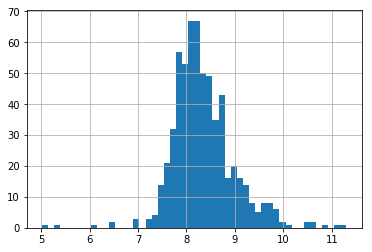

In [273]:
loan_train['ApplicantIncome'].hist(bins=50)

In [274]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674197,0.000000,4.867534,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430327,7.319202,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006701,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.857094,7.765993,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699681,0.000000,4.948760,360.0,1.0,2,1


# Correlation matrix & Heat map:

In [275]:
corr=loan_train.corr()

Text(0.5,1,'Heatmap of Correlation Matrix')

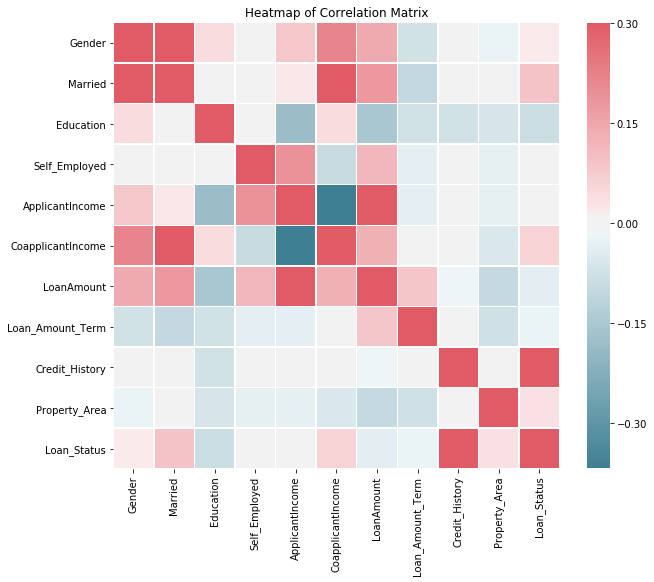

In [276]:
plt.figure(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=cmap,
             vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [277]:
imp_features=pd.DataFrame(corr['Loan_Status'].drop('Loan_Status'))
imp_features.sort_values(by='Loan_Status',ascending=False)

,Loan_Status
Credit_History,0.540556
Married,0.091478
CoapplicantIncome,0.060593
Property_Area,0.032112
Gender,0.017987
ApplicantIncome,0.010959
Self_Employed,-0.003700
Loan_Amount_Term,-0.022549
LoanAmount,-0.035713
Education,-0.085884


Credit history is dominating all others

In [278]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# TEST DATA:

In [279]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [280]:
#missing values:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [281]:
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0],inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0],inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0],inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0],inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0],inplace=True)

In [282]:
table=loan_test.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education'
                            ,aggfunc='median')
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,120.0
Yes,137.0,119.0


In [283]:
def fage(y):                                                    #ask sir
     return table.loc[y['Self_Employed'],y['Education']]
# Replace missing values
loan_test['LoanAmount'].fillna(loan_test[loan_test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [284]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [285]:
#transformations:
loan_test['LoanAmount']=np.log(loan_test['LoanAmount'])
loan_test['ApplicantIncome']=np.log(1+loan_test['ApplicantIncome'])
loan_test['CoapplicantIncome']=np.log(1+loan_test['CoapplicantIncome'])

In [286]:
#Label encoding:
columns=['Gender','Married','Education','Self_Employed','Property_Area']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    loan_test[i]=le.fit_transform(loan_test[i])
#same we can do map function also map({ý:1,n:o})

In [287]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,8.651899,0.000000,4.700480,360.0,1.0,2
1,LP001022,1,1,1,0,0,8.031710,7.313887,4.836282,360.0,1.0,2
2,LP001031,1,1,2,0,0,8.517393,7.496097,5.337538,360.0,1.0,2
3,LP001035,1,1,2,0,0,7.758333,7.842671,4.605170,360.0,1.0,2
4,LP001051,1,0,0,1,0,8.094684,0.000000,4.356709,360.0,1.0,2


# Split the data into train samples and target samples:

In [319]:
x_train=loan_train.drop(['Loan_ID','Dependents','Loan_Status'],axis=1)
y_train=loan_train['Loan_Status']

In [320]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_train,y_train,test_size=0.3,random_state=1234)

# Classification:

In [289]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score,GridSearchCV

# DecisionTree:

In [290]:
tree_model=DecisionTreeClassifier(max_depth=4)
tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [291]:
tree_model.fit(X=x_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [323]:
pred1=tree_model.predict(test_x)

In [325]:
accuracy_score(test_y,pred1)

0.8432432432432433

In [292]:
pred=tree_model.predict(loan_test.drop(['Loan_ID','Dependents'],axis=1))

In [293]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [249]:
#Create a series with feature importances:
featimp = pd.Series(tree_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print (featimp)

Credit_History      0.684322
LoanAmount          0.116865
Loan_ID             0.067535
Property_Area       0.051728
ApplicantIncome     0.042882
Loan_Amount_Term    0.036668
Self_Employed       0.000000
Education           0.000000
Married             0.000000
Gender              0.000000
dtype: float64


In [326]:
cross_val_score(tree_model,X=x_train,y=y_train,cv=5,n_jobs=1,scoring='roc_auc').mean()

0.7077799986391318

In [251]:
tree_model.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [260]:
grid_param={'max_depth':[3,4,5,6,7],'criterion':['gini','entropy']}

In [261]:
grid_search=GridSearchCV(tree_model,param_grid=grid_param,scoring='roc_auc',cv=5,n_jobs=1)

In [262]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [263]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

# RandomForest:

In [310]:
model1=RandomForestClassifier(n_estimators=150,max_depth=2)


In [311]:
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [312]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,8.651899,0.000000,4.700480,360.0,1.0,2
1,LP001022,1,1,1,0,0,8.031710,7.313887,4.836282,360.0,1.0,2
2,LP001031,1,1,2,0,0,8.517393,7.496097,5.337538,360.0,1.0,2
3,LP001035,1,1,2,0,0,7.758333,7.842671,4.605170,360.0,1.0,2
4,LP001051,1,0,0,1,0,8.094684,0.000000,4.356709,360.0,1.0,2


In [313]:
prediction=model1.predict(loan_test.drop(['Loan_ID','Dependents'],axis=1))
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [267]:
accuracy_score(test_y,prediction)

0.8324324324324325

In [268]:
cross_val_score(model1,x_train,y_train,cv=5,n_jobs=1).mean()

0.8079587519830778

In [269]:
featimp = pd.Series(model1.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print (featimp)

Credit_History      0.530353
LoanAmount          0.111344
ApplicantIncome     0.108692
Property_Area       0.077795
Loan_Amount_Term    0.063589
Loan_ID             0.062416
Married             0.019936
Education           0.016752
Self_Employed       0.006135
Gender              0.002987
dtype: float64


In [270]:
grid_search=GridSearchCV(model1,param_grid=grid_param,scoring='roc_auc',cv=5,n_jobs=1)

In [271]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [272]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [274]:
train_x.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
206,206,0,0,0,0,8.084562,4.382027,360.0,1.0,2
13,13,1,0,0,0,7.524561,4.736198,360.0,1.0,0
89,89,1,1,0,0,8.647344,5.164786,360.0,1.0,1
22,22,1,1,1,0,7.863267,4.753590,360.0,0.0,1
108,108,1,1,0,0,8.242756,5.375278,360.0,0.0,2


In [314]:
pred_final=pd.DataFrame(Predictons,columns=['Loan_Status'])
pred_final.to_csv('C:\\Users\\HP User\\Desktop\\out.csv')

In [315]:
Predictons=np.where(prediction==1,'Y','N')

In [316]:
Predictons

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [317]:
Pred=np.where(pred==1,'Y','N')

In [318]:
pred_final=pd.DataFrame(Pred,columns=['Loan_Status'])
pred_final.to_csv('C:\\Users\\HP User\\Desktop\\out1.csv')

# LogisticRegression:

In [332]:
reg=LogisticRegression(C=0.5)

In [333]:
reg.fit(train_x,train_y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [334]:
predict=reg.predict(test_x)

In [335]:
accuracy_score(test_y,predict)

0.8324324324324325

In [336]:
cross_val_score(reg,x_train,y_train,cv=5,n_jobs=1).mean()

0.8095716552088842

In [337]:
PREDICT=reg.predict(loan_test.drop(['Loan_ID','Dependents'],axis=1))

In [338]:
predict2=np.where(PREDICT==1,'Y','N')

In [339]:
pred_final=pd.DataFrame(predict2,columns=['Loan_Status'])
pred_final.to_csv('C:\\Users\\HP User\\Desktop\\out2.csv')